In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import norm, zscore
from scipy.stats import shapiro, kstest
import warnings
warnings.filterwarnings('ignore')








In [2]:
df = pd.read_csv('Jamboree_Admission.csv')

In [3]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
# Drop the unique row Identifier
df.drop(columns=['Serial No.'], inplace=True)

In [5]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [6]:
# Display summary statistics
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
# Checking for missing values
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

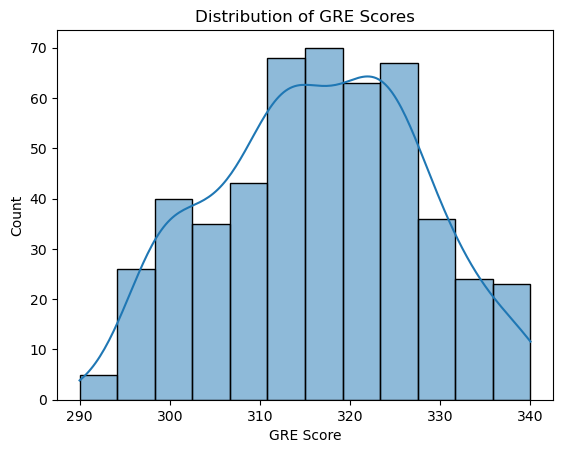

In [8]:
# Distribution plots
sns.histplot(df['GRE Score'], kde=True)
plt.title('Distribution of GRE Scores')
plt.show()

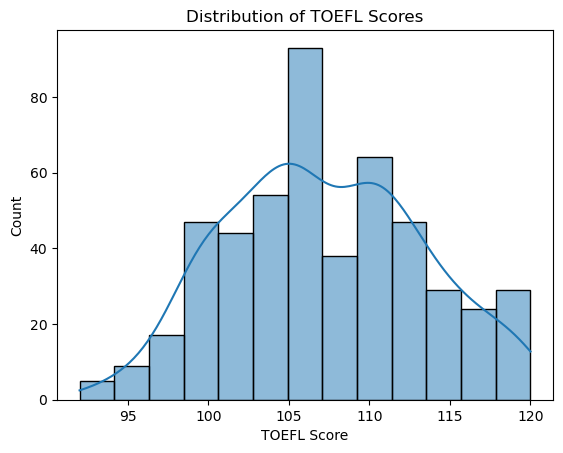

In [9]:
sns.histplot(df['TOEFL Score'], kde=True)
plt.title('Distribution of TOEFL Scores')
plt.show()

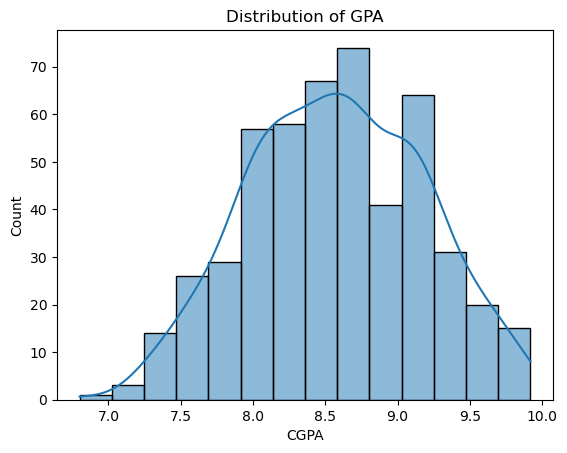

In [10]:
sns.histplot(df['CGPA'], kde=True)
plt.title('Distribution of GPA')
plt.show()

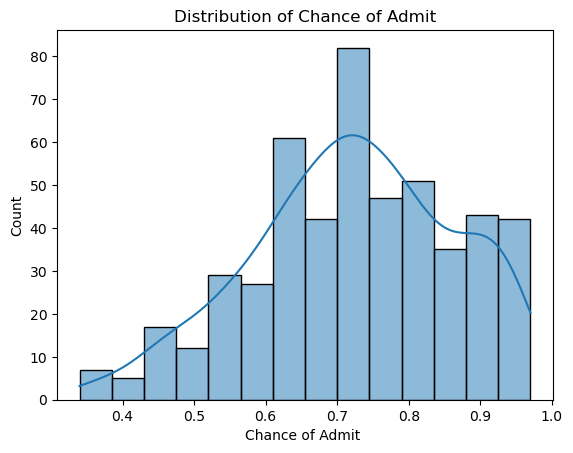

In [11]:
sns.histplot(df['Chance of Admit '], kde=True)
plt.title('Distribution of Chance of Admit')
plt.show()

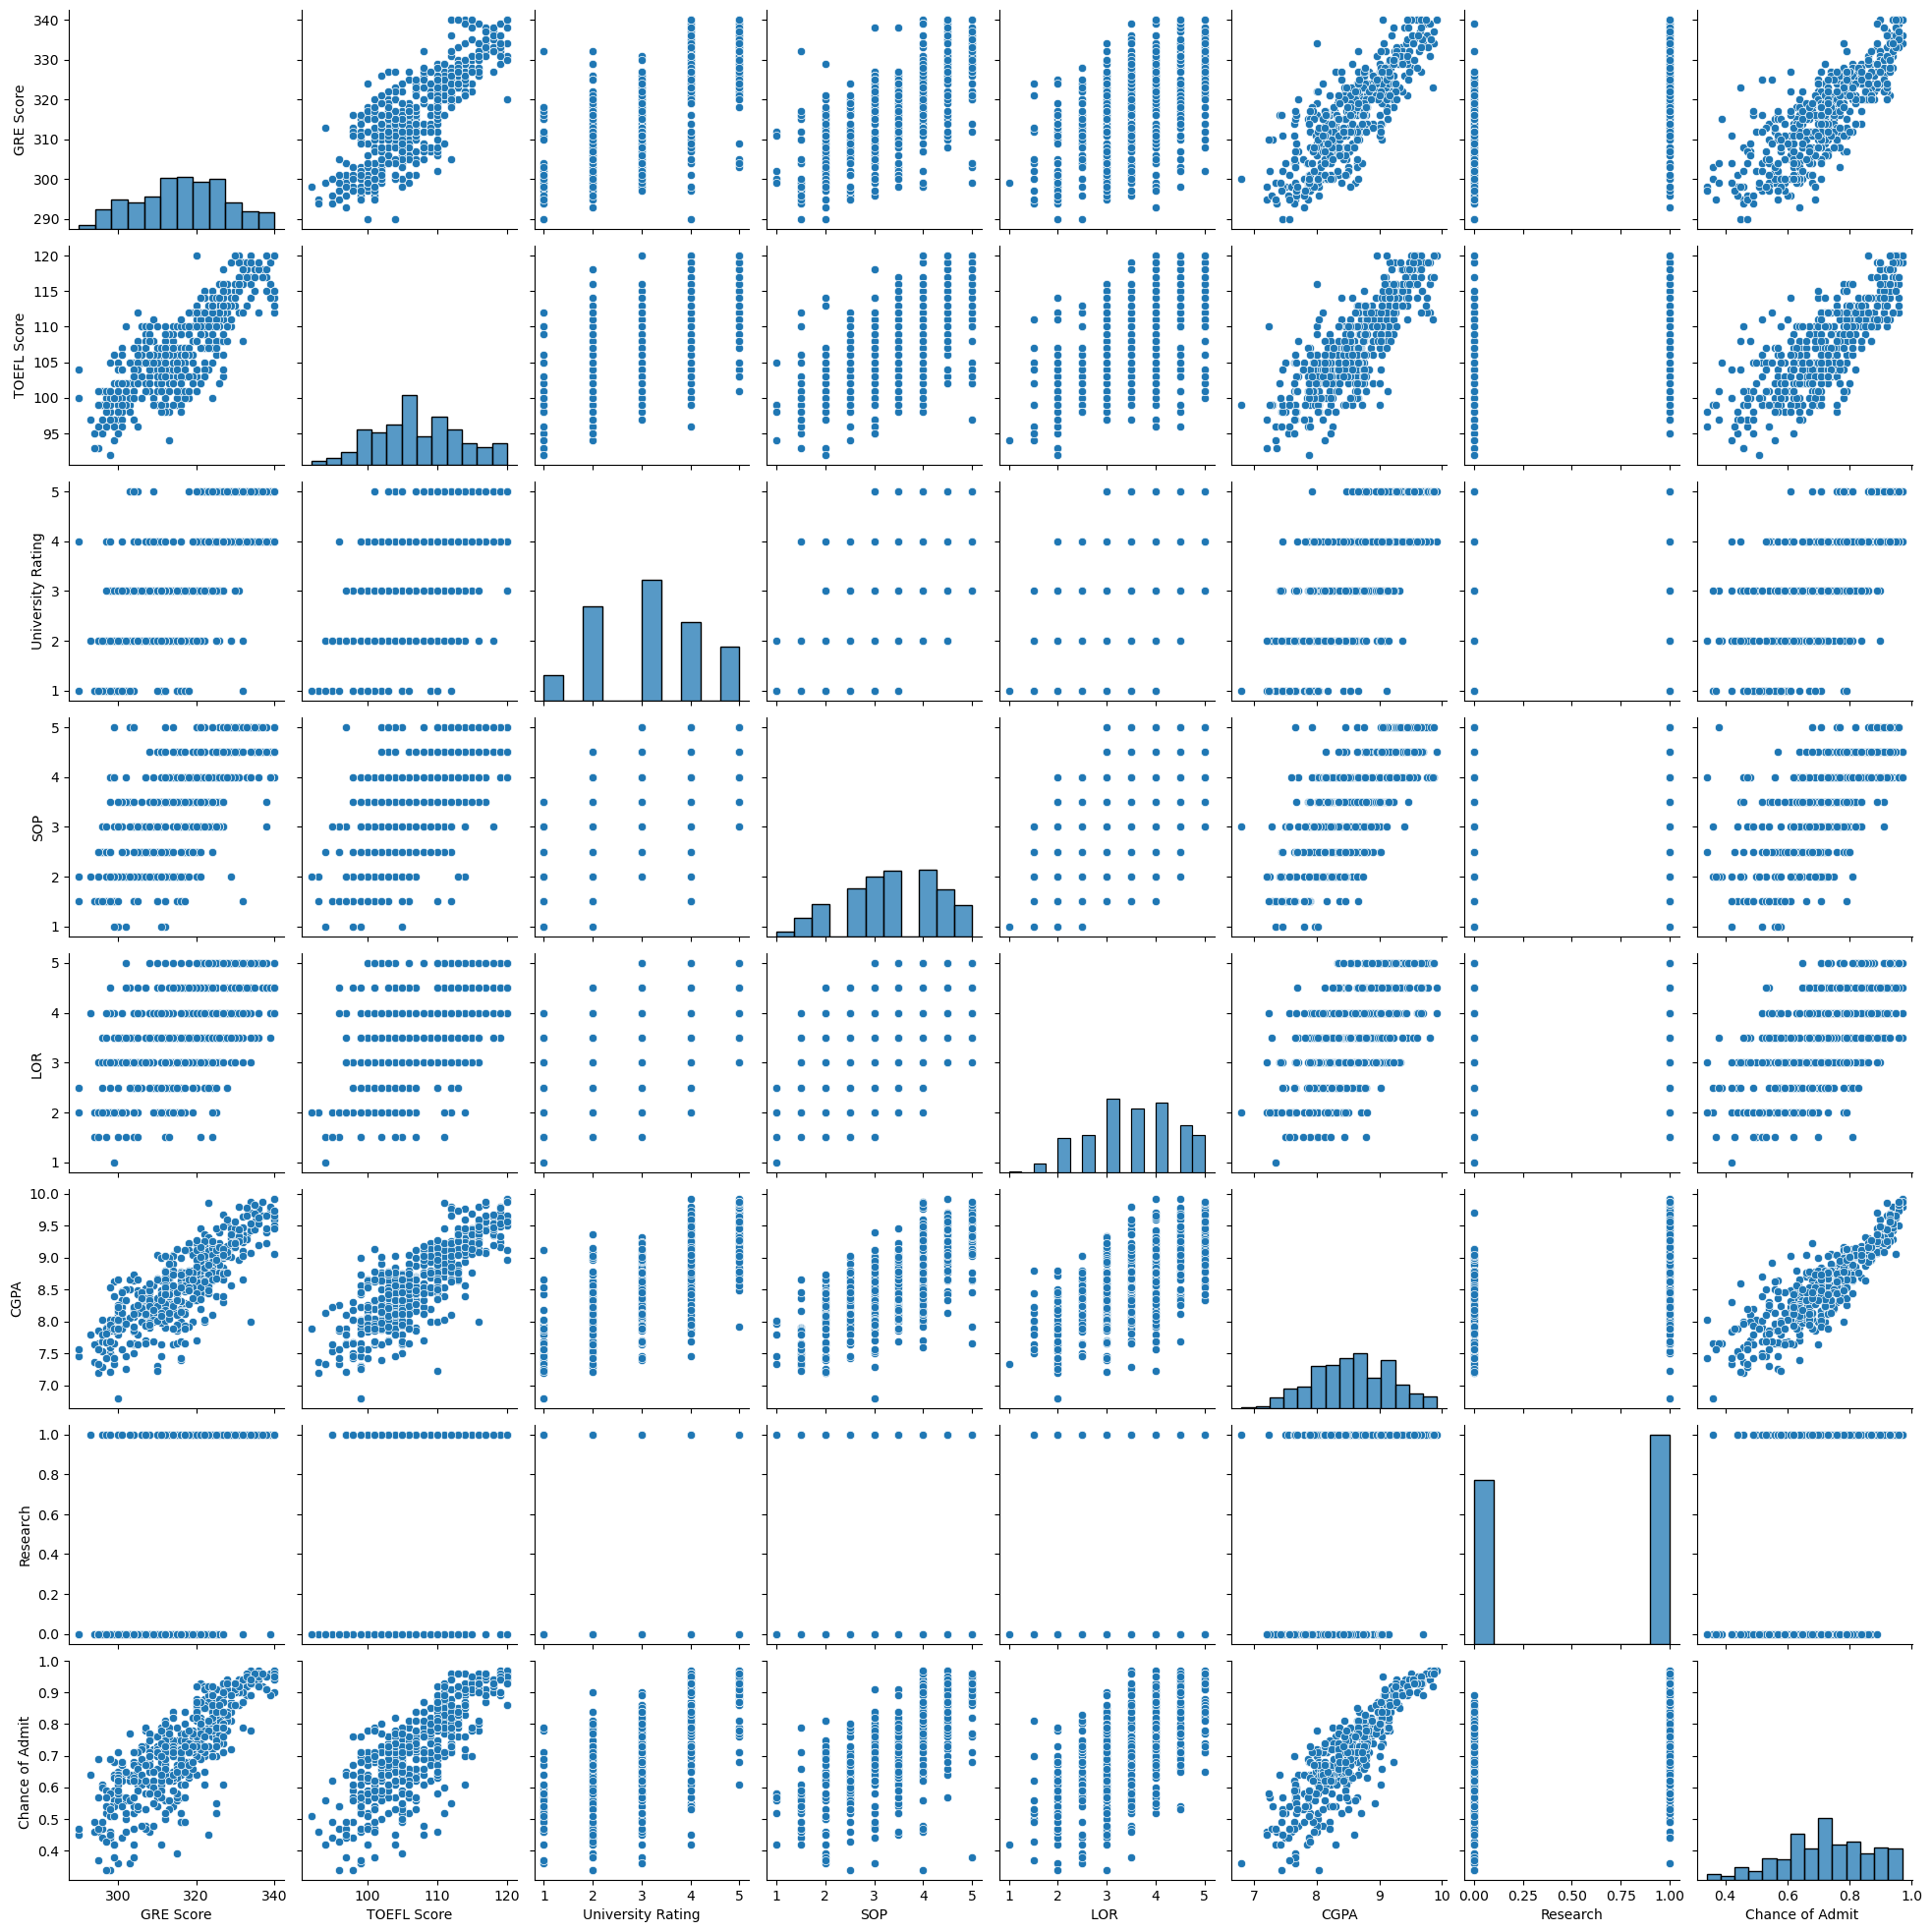

In [12]:
# Pairplot to understand relationships
sns.pairplot(df)
plt.show()

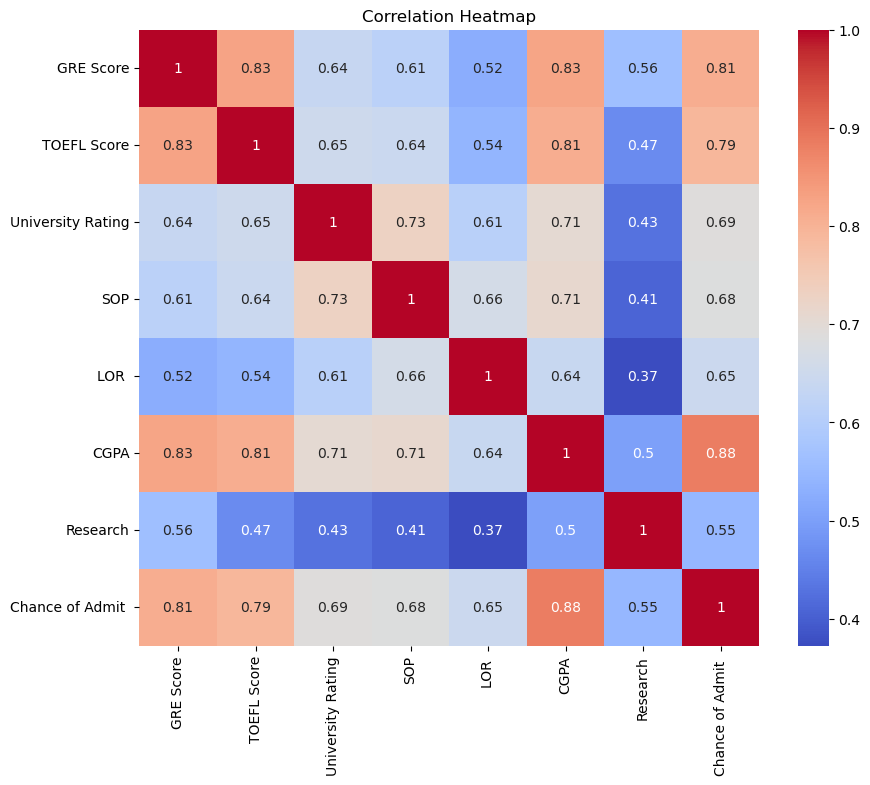

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
# Check for duplicates
print(df.duplicated().sum())

0


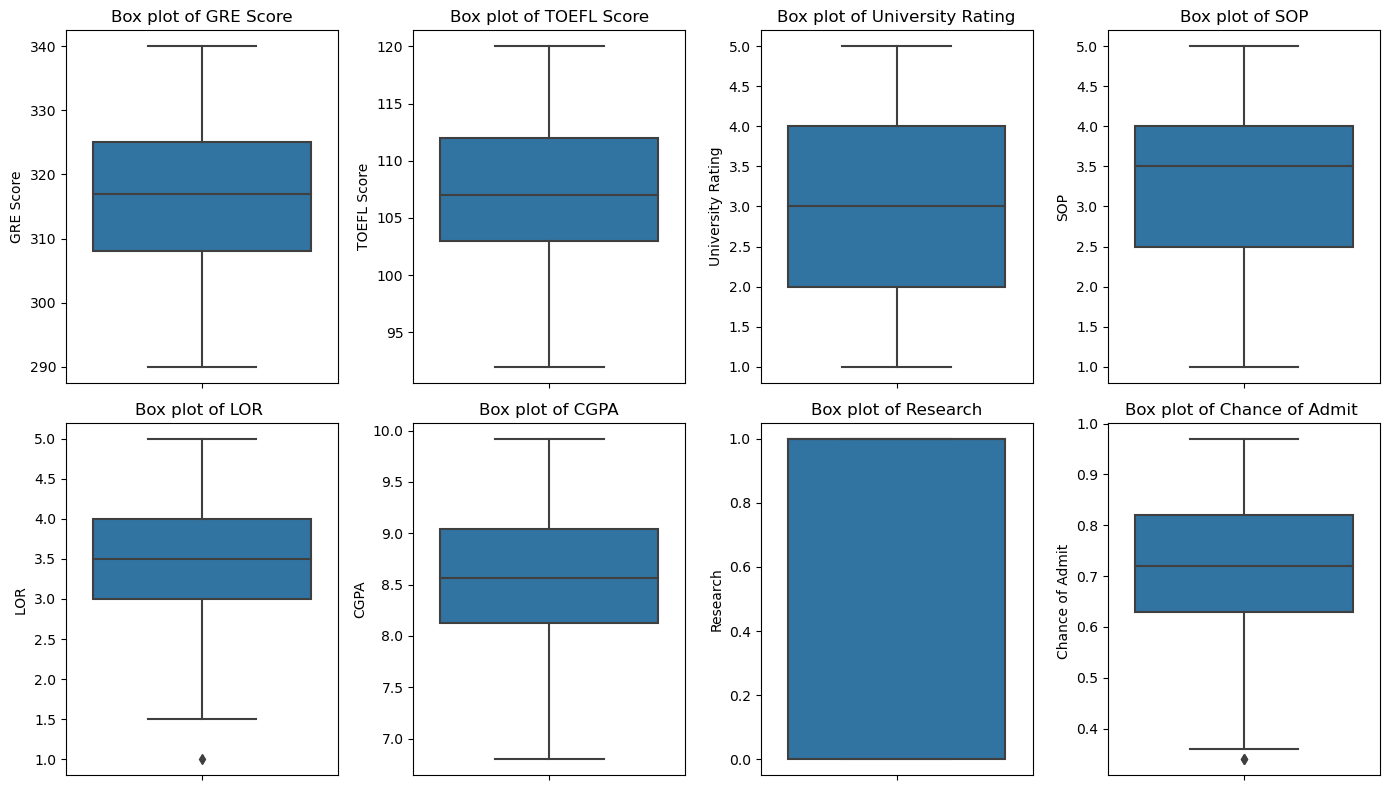

In [15]:
plt.figure(figsize=(14, 8))
for i, column in enumerate(df.columns, 1):
    plt.subplot(2, 4, i)  # Adjust the number of rows and columns as needed
    sns.boxplot(y=df[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

1. outliers are seen in "Chance of Admit" and "LOR" variables.
2. since "Chance of Admit" is the output variable, we dont try to modify anything in it.
3. In LOR variable there is one outlier as per box plot. upon carefull looking into the data, ythis point corresponds to a value of 1 in LOR but "Chance of Admit" is not the lowest corrsponding to this point. so decided not to eliminate this point. need to see it's adverse impact if any in subsequent analysis and then decide whether it is really necessaru to remove this data point.
4. rest of the variables or features do not show any outliers based on box plot analysis.

In [16]:
# Define features and target variable

y = df['Chance of Admit ']
X = df.drop(columns=['Chance of Admit '])

In [17]:
# First split: 80% training, 20% temporary
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

In [18]:
# Second split: 50% validation, 50% test (20% each of the original dataset)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [19]:
X.shape

(500, 7)

In [20]:
y.shape

(500,)

In [21]:
X_temp.shape

(200, 7)

In [22]:
y_temp.shape

(200,)

In [23]:
X_train.shape

(300, 7)

In [24]:
y_train.shape

(300,)

In [25]:
X_val.shape

(100, 7)

In [26]:
y_val.shape

(100,)

In [27]:
X_test.shape

(100, 7)

In [28]:
y_test.shape

(100,)

normalize the data (as Research feature has only two values 0 and 1, they will remain same after normalization; interpretaions will be easier (compared to standardisation)

In [29]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

In [30]:
# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

In [31]:
# Transform the validation and test data using the fitted scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Convert the scaled data back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [33]:
# Display the first few rows of the scaled training DataFrame
print("Scaled Training Data:")
X_train_scaled.head()

Scaled Training Data:


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.511111,0.321429,1.00,0.625,1.000000,0.634615,1.0
1,0.600000,0.821429,1.00,0.750,0.857143,0.820513,1.0
2,0.733333,0.642857,0.75,0.750,0.285714,0.711538,1.0
3,0.600000,0.642857,1.00,0.875,0.714286,0.695513,0.0
4,0.488889,0.464286,0.50,0.625,0.428571,0.564103,0.0


In [34]:
# Display the first few rows of the scaled validation DataFrame
print("Scaled Validation Data:")
X_val_scaled.head()

Scaled Validation Data:


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.688889,0.714286,0.50,0.625,0.428571,0.721154,1.0
1,0.222222,0.428571,0.25,0.375,0.000000,0.317308,0.0
2,0.666667,0.642857,0.75,0.875,0.714286,0.692308,1.0
3,0.377778,0.464286,0.25,0.250,0.285714,0.528846,0.0
4,0.311111,0.464286,1.00,0.625,0.571429,0.564103,0.0


In [35]:
# Display the first few rows of the scaled test DataFrame
print("Scaled Testing Data:")
X_test_scaled.head()

Scaled Testing Data:


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.088889,0.071429,0.00,0.000,-0.142857,0.173077,0.0
1,0.022222,0.178571,0.25,0.125,0.142857,0.320513,0.0
2,0.111111,0.321429,0.50,0.625,0.285714,0.346154,0.0
3,0.155556,0.250000,0.50,0.375,0.428571,0.208333,0.0
4,0.622222,0.750000,0.50,0.750,0.428571,0.807692,1.0


In [231]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [232]:
model.coef_

array([0.09360851, 0.08038614, 0.01316279, 0.03133496, 0.04754858,
       0.37621232, 0.01329912])

In [233]:
model.intercept_

0.3608522782942987

In [235]:
R2_train=model.score(X_train_scaled, y_train)

In [236]:
R2_train

0.8273861931402555

In [237]:
model_v=LinearRegression()
model_v.fit(X_val_scaled,y_val)

LinearRegression()

In [238]:
R2_val=model_v.score(X_val_scaled,y_val)

In [239]:
R2_val

0.8298968651825365

In [243]:
X_train_scaled.shape

(300, 7)

In [242]:
adj_R2_train=1-((1-R2_train)*(len(y_train) -1))/((len(y_train) -1)-X_train_scaled.shape[1])

In [244]:
# adj-R2 of train (scaled) data
adj_R2_train

0.8232481909210151

In [245]:
# adj-R2 of val (scaled) data
adj_R2_val=1-((1-R2_val)*(len(y_val) -1))/((len(y_val) -1)-X_val_scaled.shape[1])

In [246]:
adj_R2_val

0.8169542353594685

R2 of train (scaled) data is     : 0.8273861931402555
R2 of val (scaled) data is       : 0.8298968651825365
adj R2 of train (scaled) data is : 0.8232481909210151
adj R2 of val (scaled) data is   : 0.8169542353594685

R2 score of train data and val data are nearby
adj R2 score of train data and val data are nearby

We can say that model performance of train data and val data are similar indicating "no overfitting or underfitting" situation

From the analysis in "veeranna_jamboree_business_case_00" ipython notebook, polynomial features (degree 2) and interaction features were not significant. so finally decided to create the linear regression model with oroginal features only.

Feature Engineering from the point of view of enhancing the performance has been done in "veeranna_jamboree_business_case_00" ipython notebook. The added features are sequencially eliminated based on VIF values. However, I was not able to do model performance evaluation in "veeranna_jamboree_business_case_00" ipython notebook, in which "stats model" linear regression method used. I faced "ValueError: The indices for endog and exog are not aligned" issues, which I was able to fix in a couple of places but there were more unknown impacts, which I was not able to debug. so build linear regression model using sklearn in seperate notebookbook. 

R2 and adj R2 values of the final model (after eliminating all non significant features) are closely matching, particularly adj R2 of 0.823 for training data in both cases.

However detailed EDA is not done as the focus is more on Linear Regression. But basic EDA has been done.



